Here's a quick demonstration of my fitACF routines for constraining scattering timescale and TOA error from DISS. I'll be using NANOGrav's 8-hour observation of J1614-2230 as a demo.

In [2]:
import fitACF
import matplotlib.pyplot as plt
import numpy as np
import pypulse as pp

In [ ]:
filename = '/path/to/archive/file'
ar = pp.Archive(filename)

In [ ]:
template_file = '/path/to/template/file'
template_ar = pp.Archive(template_file)

Last but not least, we create our dynamic spectrum using the template file:

In [5]:
ds = ar.getDynamicSpectrum(template = template_ar)

Alright, let's take a look at our data...

Text(0.5, 1.0, "Dynamic Spectrum of J1614's 8-Hour Observation")

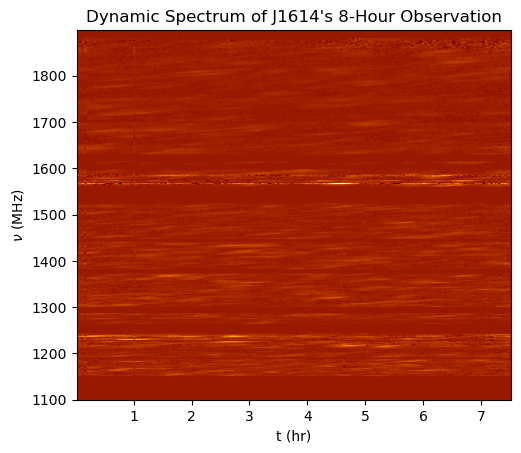

In [6]:
data = np.fliplr(np.flip(ds.getData()))
hrs = ar.getTimes()/3600
freqs = ar.getFreqs()
obs_len_t = ar.getDuration()
obs_len_f = ar.getBandwidth()

plt.imshow(data, 
           aspect = 0.008,
           cmap = 'afmhot',
           extent = [hrs[0], hrs[-1],
                      freqs[0], freqs[-1]],
            norm = 'linear'
           )
 
plt.xlabel('t (hr)')
plt.ylabel(r'$\nu$ (MHz)')
plt.title('Dynamic Spectrum of J1614\'s 8-Hour Observation')

Now let's analyze this dynamic spectrum with `fitACF`.

dt = 42.425 min, dnu = 19.641 MHz
tau_d = 0.008 us


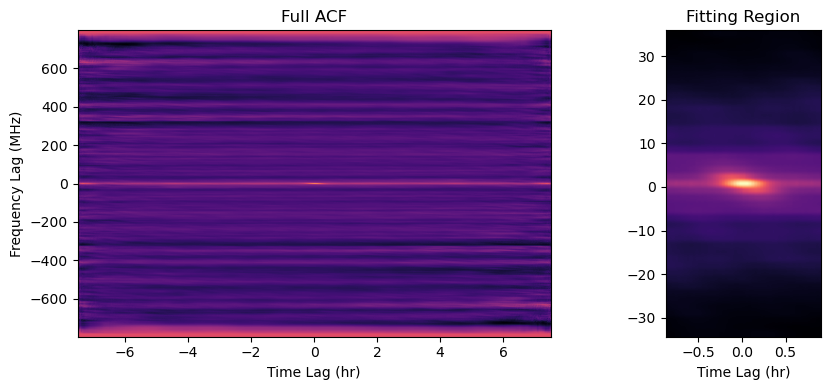

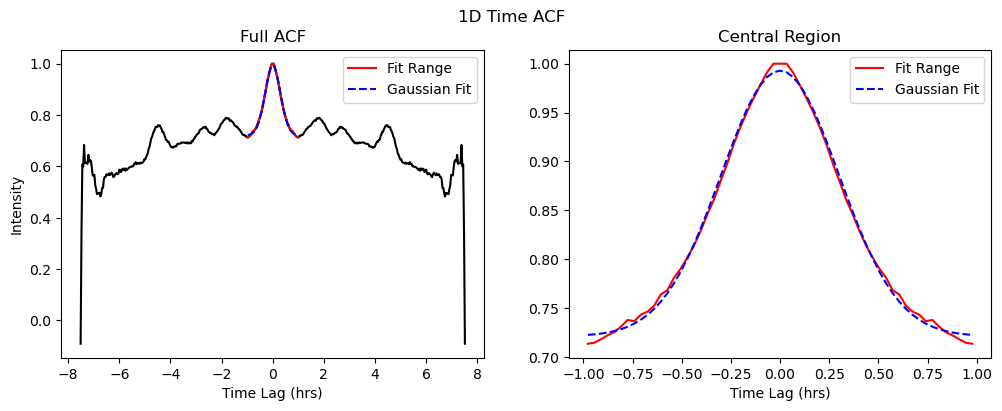

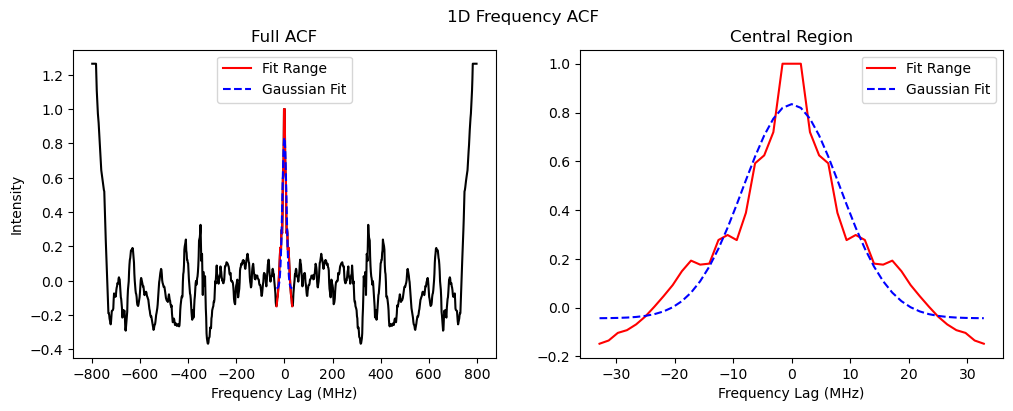

In [11]:
tau_d, sig_DISS = fitACF.scattering_timescale(ds, hrs, freqs)

In [18]:
print(f'The scattering timescale is {np.round(tau_d, 3)} and the error from diffractive \
interstellar scintillation \nis {np.round(sig_DISS, 3)}.')

The scattering timescale is 0.008 us and the error from diffractive interstellar scintillation 
is 0.002 us.
